<a href="https://colab.research.google.com/github/dornercr/INFO371/blob/main/week3_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INFO 371: Data Mining Applications

## Week 3: Customer Churn Prediction Using KNN
### Prof. Charles Dorner, EdD (Candidate)
### College of Computing and Informatics, Drexel University

In [3]:
# Step 1: Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
import random


In [5]:
# Create a synthetic dataset simulating customer behavior
X, y = make_classification(n_samples=150,
                           n_features=4,
                           n_informative=3,
                           n_redundant=0,
                           n_classes=2,
                           weights=[0.6, 0.4],  # 60% stayed, 40% churned
                           class_sep=1.5,
                           random_state=42)

# Create DataFrame with real-life-style column names
df = pd.DataFrame(X, columns=['monthly_charges', 'tenure_months', 'support_calls', 'contract_length'])
df['churn'] = y  # 0 = stayed, 1 = churned

df.head()


,monthly_charges,tenure_months,support_calls,contract_length,churn
0,-1.624070,-1.483057,1.836956,-0.007973,0
1,-3.078496,-1.632581,-0.207804,1.201214,0
2,-1.108552,-1.132202,1.362099,-1.422254,0
3,-0.499289,-1.126474,-2.253701,-0.856084,0
4,-1.348976,-0.983757,-1.481756,0.333662,0


In [6]:
# Separate features and label
X_train = df.drop('churn', axis=1)
y_train = df['churn']


In [7]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the same training set
y_pred = knn.predict(X_train)

# View raw predictions
print("Predictions:", y_pred)


Predictions: [0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0
 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0
 1 0]


In [8]:
# Accuracy
acc = accuracy_score(y_train, y_pred)
print("Accuracy:", acc)

# Precision, Recall, F1 Score
precision, recall, f1, support = precision_recall_fscore_support(y_train, y_pred)
print("Precision per class:", precision)
print("Recall per class:", recall)
print("F1 Score per class:", f1)
print("Support (class counts):", support)


Accuracy: 0.98
Precision per class: [0.97802198 0.98305085]
Recall per class: [0.98888889 0.96666667]
F1 Score per class: [0.98342541 0.97478992]
Support (class counts): [90 60]


In [9]:
# Apply standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Re-train model on scaled data
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_scaled, y_train)

# Re-evaluate
y_pred_scaled = knn_scaled.predict(X_scaled)
acc_scaled = accuracy_score(y_train, y_pred_scaled)
print("Accuracy with scaling:", acc_scaled)


Accuracy with scaling: 0.9666666666666667


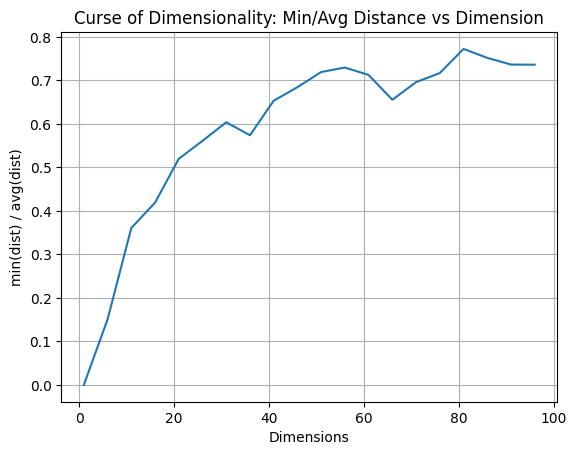

In [10]:
#Curse of Dimensionality
def random_distances(dim, num_pairs=10000):
    return [distance.euclidean(np.random.rand(dim), np.random.rand(dim)) for _ in range(num_pairs)]

dimensions = range(1, 101, 5)
avg_distances = []
min_distances = []

for dim in dimensions:
    dists = random_distances(dim)
    avg_distances.append(np.mean(dists))
    min_distances.append(min(dists))

# Plot: ratio of min to avg distance vs dimension count
plt.plot(dimensions, np.array(min_distances) / np.array(avg_distances))
plt.title("Curse of Dimensionality: Min/Avg Distance vs Dimension")
plt.xlabel("Dimensions")
plt.ylabel("min(dist) / avg(dist)")
plt.grid(True)
plt.show()
